[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/skylercain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Epoch 1/10


/Users/skylercain/code/cs-6640-artificial-neural-networks/.direnv/python-3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3913/3913 ━━━━━━━━━━━━━━━━━━━━ 238s 61ms/step - accuracy: 0.2200 - loss: 2.9342 - val_accuracy: 0.4913 - val_loss: 1.7689
Epoch 2/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 228s 58ms/step - accuracy: 0.4988 - loss: 1.7675 - val_accuracy: 0.5704 - val_loss: 1.4890
Epoch 3/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 229s 59ms/step - accuracy: 0.5889 - loss: 1.4476 - val_accuracy: 0.6064 - val_loss: 1.3598
Epoch 4/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 219s 56ms/step - accuracy: 0.6388 - loss: 1.2502 - val_accuracy: 0.6373 - val_loss: 1.2789
Epoch 5/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 237s 61ms/step - accuracy: 0.6731 - loss: 1.1151 - val_accuracy: 0.6622 - val_loss: 1.2290
Epoch 6/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 235s 60ms/step - accuracy: 0.7093 - loss: 0.9861 - val_accuracy: 0.6798 - val_loss: 1.2021
Epoch 7/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 245s 63ms/step - accuracy: 0.7299 - loss: 0.9021 - val_accuracy: 0.6980 - val_loss: 1.1710
Epoch 8/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 244s 62ms/step - accuracy: 0.7535 - lo

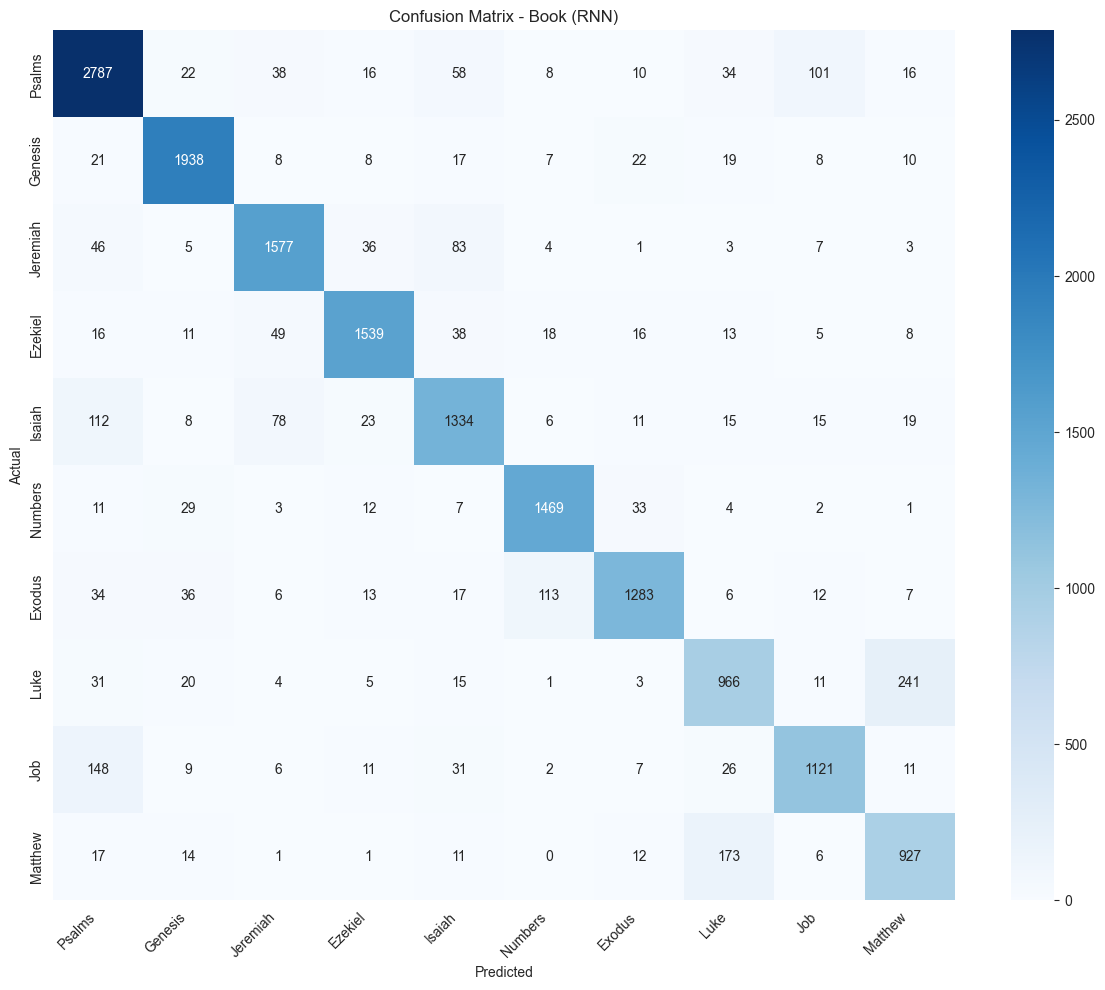

Target Names: ['Psalms', 'Genesis', 'Jeremiah', 'Ezekiel', 'Isaiah', 'Numbers', 'Exodus', 'Luke', 'Job', 'Matthew']
Unique Labels in y_test_filtered: []

Classification Report (Book - RNN):
\Lables: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
              precision    recall  f1-score   support

      Psalms       0.00      0.00      0.00       0.0
     Genesis       0.00      0.00      0.00       0.0
    Jeremiah       0.00      0.00      0.00       0.0
     Ezekiel       0.00      0.00      0.00       0.0
      Isaiah       0.00      0.00      0.00       0.0
     Numbers       0.00      0.00      0.00       0.0
      Exodus       0.00      0.00      0.00       0.0
        Luke       0.00      0.00      0.00       0.0
         Job       0.00      0.00      0.00       0.0
     Matthew       0.00      0.00      0.00       0.0

    accuracy                           0.00       0.0
   macro avg       0.00      0.00      0.00       0.0
weighted avg       0.00      0.00      0.00       0.0

Epoch 1/10


/Users/skylercain/code/cs-6640-artificial-neural-networks/.direnv/python-3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3913/3913 ━━━━━━━━━━━━━━━━━━━━ 246s 63ms/step - accuracy: 0.3669 - loss: 2.2484 - val_accuracy: 0.6110 - val_loss: 1.3032
Epoch 2/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 238s 61ms/step - accuracy: 0.6360 - loss: 1.2553 - val_accuracy: 0.6740 - val_loss: 1.0990
Epoch 3/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 248s 63ms/step - accuracy: 0.7132 - loss: 0.9861 - val_accuracy: 0.7071 - val_loss: 1.0002
Epoch 4/10
3913/3913 ━━━━━━━━━━━━━━━━━━━━ 254s 65ms/step - accuracy: 0.7567 - loss: 0.8291 - val_accuracy: 0.7371 - val_loss: 0.9208
Epoch 5/10
2994/3913 ━━━━━━━━━━━━━━━━━━━━ 55s 60ms/step - accuracy: 0.7915 - loss: 0.6943

KeyboardInterrupt: 

In [8]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Load Bible translations
columns = ['verse_id', 'book_id', 'chapter', 'verse', 'text']
translations = ['t_kjv.csv', 't_asv.csv', 't_bbe.csv', 't_dby.csv', 't_wbt.csv', 't_web.csv', 't_ylt.csv']
translation_names = ['KJV', 'ASV', 'BBE', 'DBY', 'WBT', 'WEB', 'YLT']

all_translations = pd.DataFrame()
for file, name in zip(translations, translation_names):
    file_path = f'bible_data/bible_databases-master/bible_databases-master/csv/{file}'
    df = pd.read_csv(file_path)
    df.columns = columns
    df['translation'] = name
    df['cleaned_text'] = df['text'].apply(preprocess_text)
    all_translations = pd.concat([all_translations, df], ignore_index=True)

# Merge with book metadata
key_english = pd.read_csv('bible_data/bible_databases-master/bible_databases-master/csv/key_english.csv')
key_english.columns = ['book_id', 'book_name', 'testament', 'genre']
all_translations = all_translations.merge(key_english, on='book_id', how='left')

# Map authors to verses using the provided author list
author_list = {
    "Genesis": "Moses",
    "Exodus": "Moses",
    "Leviticus": "Moses",
    "Numbers": "Moses",
    "Deuteronomy": "Moses",
    "Joshua": "Joshua",
    "Judges": "Samuel, Nathan, Gad",
    "Ruth": "Samuel, Nathan, Gad",
    "1 Samuel (1 Kings)": "Samuel, Nathan, Gad",
    "2 Samuel (2 Kings)": "Samuel, Nathan, Gad",
    "1 Kings (3 Kings)": "Jeremiah",
    "2 Kings (4 Kings)": "Jeremiah",
    "1 Chronicles": "Ezra",
    "2 Chronicles": "Ezra",
    "Ezra": "Ezra",
    "Nehemiah": "Nehemiah, Ezra",
    "Esther": "Mordecai",
    "Job": "Job,Moses",
    "Psalms": "David,Asaph, Ezra, the sons of Korah, Heman, Ethan, Moses",
    "Proverbs": "Solomon ,Agur(30) and Lemuel(31)",
    "Ecclesiastes": "Solomon",
    "Song of Solomon (Canticles)": "Solomon",
    "Isaiah": "Isaiah",
    "Jeremiah": "Jeremiah",
    "Lamentations": "Jeremiah",
    "Ezekiel": "Ezekiel",
    "Daniel": "Daniel",
    "Hosea": "Hosea",
    "Joel": "Joel",
    "Amos": "Amos",
    "Obadiah": "Obadiah",
    "Jonah": "Jonah",
    "Micah": "Micah",
    "Nahum": "Nahum",
    "Habakkuk": "Habakkuk",
    "Zephaniah": "Zephaniah",
    "Haggai": "Haggai",
    "Zechariah": " Zechariah",
    "Malachi": "Malachi",
    "Matthew": "Matthew",
    "Mark": "John Mark",
    "Luke": "Luke",
    "John": "John, the Apostle",
    "Acts": "Luke",
    "Romans": "Paul",
    "1 Corinthians": "Paul",
    "2 Corinthians": "Paul",
    "Galatians": "Paul",
    "Ephesians": "Paul",
    "Philippians": "Paul",
    "Colossians": "Paul",
    "1 Thessalonians": "Paul",
    "2 Thessalonians": "Paul",
    "1 Timothy": "Paul",
    "2 Timothy": "Paul",
    "Titus": "Paul",
    "Philemon": "Paul",
    "Hebrews": "Paul, Luke, Barnabas, Apollos",
    "James": "James the brother of Jesus and Jude (not the Apostle, brother of John).",
    "1 Peter": "Peter",
    "2 Peter": "Peter",
    "1 John": "John, the Apostle",
    "2 John": "John, the Apostle",
    "3 John": "John, the Apostle",
    "Jude": "Jude, the brother of Jesus",
    "Revelation": "John, the Apostle"
}
all_translations['author'] = all_translations['book_name'].map(author_list)

# Drop rows with missing author information (if any)
all_translations = all_translations.dropna(subset=['author'])

# Tokenize text
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(all_translations['cleaned_text'])
sequences = tokenizer.texts_to_sequences(all_translations['cleaned_text'])
x_data = pad_sequences(sequences, maxlen=100)

# Encode labels for book, author, and translation
label_encoder_book = LabelEncoder()
label_encoder_author = LabelEncoder()
label_encoder_translation = LabelEncoder()

y_data_book = label_encoder_book.fit_transform(all_translations['book_name'])
y_data_author = label_encoder_author.fit_transform(all_translations['author'])
y_data_translation = label_encoder_translation.fit_transform(all_translations['translation'])

# Split data into training and testing sets
x_train, x_test, y_train_book, y_test_book = train_test_split(x_data, y_data_book, test_size=0.2, random_state=42)
_, _, y_train_author, y_test_author = train_test_split(x_data, y_data_author, test_size=0.2, random_state=42)
_, _, y_train_translation, y_test_translation = train_test_split(x_data, y_data_translation, test_size=0.2, random_state=42)

from sklearn.metrics import confusion_matrix, classification_report

def build_and_train_model(model_type, x_train, y_train, x_test, y_test, num_classes, task_name, top_n=None):
    # Build the model
    if model_type == "RNN":
        model = Sequential([
            Embedding(input_dim=20000, output_dim=128, input_length=100),
            LSTM(128, return_sequences=False),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
    elif model_type == "CNN":
        model = Sequential([
            Embedding(input_dim=20000, output_dim=128, input_length=100),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
    elif model_type == "RCNN":
        model = Sequential([
            Embedding(input_dim=20000, output_dim=128, input_length=100),
            LSTM(128, return_sequences=True),
            Dropout(0.5),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
    else:
        raise ValueError("Invalid model type. Choose from 'RNN', 'CNN', or 'RCNN'.")

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Test Accuracy ({task_name} - {model_type}): {accuracy}")

    # Generate predictions
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    if top_n:
        # Compute the full confusion matrix
        cm_full = confusion_matrix(y_test, y_pred_classes)
    
        # Create a DataFrame for easier handling
        cm_df = pd.DataFrame(
            cm_full,
            index=label_encoder_book.classes_ if task_name == "Book" else (
                label_encoder_author.classes_ if task_name == "Author" else
                label_encoder_translation.classes_),
            columns=label_encoder_book.classes_ if task_name == "Book" else (
                label_encoder_author.classes_ if task_name == "Author" else
                label_encoder_translation.classes_)
        )
    
        # Identify the top N most frequent actual classes
        top_classes = cm_df.sum(axis=1).sort_values(ascending=False).head(top_n).index
        target_names = list(top_classes)
    
        # Filter the test set and predictions for only the top N classes
        class_to_idx = {name: i for i, name in enumerate(top_classes)}
        y_test_filtered = [y for y in y_test if label_encoder_book.inverse_transform([y])[0] in class_to_idx]
        y_pred_filtered = [y for y in y_pred_classes if label_encoder_book.inverse_transform([y])[0] in class_to_idx]
    
        # Map filtered classes to their new indices
        y_test_filtered = [class_to_idx[label_encoder_book.inverse_transform([y])[0]] for y in y_test_filtered]
        y_pred_filtered = [class_to_idx[label_encoder_book.inverse_transform([y])[0]] for y in y_pred_filtered]
        labels = list(range(len(target_names)))

    else:
        # Use full confusion matrix and labels
        cm = confusion_matrix(y_test, y_pred_classes)
        target_names = label_encoder_book.classes_ if task_name == "Book" else (
                       label_encoder_author.classes_ if task_name == "Author" else
                       label_encoder_translation.classes_)
        y_test_filtered = y_test
        y_pred_filtered = y_pred_classes
        labels = list(range(len(target_names)))

    # Plot and save confusion matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
    plt.title(f"Confusion Matrix - {task_name} ({model_type})")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{model_type.lower()}_{task_name.lower()}.png')
    plt.show()

    # Print classification report with zero_division fix
    print(f"Target Names: {target_names}")
    print(f"Unique Labels in y_test_filtered: {np.unique(y_test_filtered)}")
    print(f"\nClassification Report ({task_name} - {model_type}):")
    print(f"\Lables: {labels}")
    print(classification_report(y_test_filtered, y_pred_filtered, target_names=target_names, labels=labels, zero_division=0))
 

    # Save the model in .keras format
    model.save(f'bible_classifier_{model_type.lower()}_{task_name.lower()}.keras')

    return accuracy, history


# Train RNN models for books, authors, and translations
accuracy_rnn_book, history_rnn_book = build_and_train_model("RNN", x_train, y_train_book, x_test, y_test_book, len(label_encoder_book.classes_), "Book", 10)
accuracy_rnn_author, history_rnn_author = build_and_train_model("RNN", x_train, y_train_author, x_test, y_test_author, len(label_encoder_author.classes_), "Author", 10)
accuracy_rnn_translation, history_rnn_translation = build_and_train_model("RNN", x_train, y_train_translation, x_test, y_test_translation, len(label_encoder_translation.classes_), "Translation", 10)

# Train CNN models for books, authors, and translations
accuracy_cnn_book, history_cnn_book = build_and_train_model("CNN", x_train, y_train_book, x_test, y_test_book, len(label_encoder_book.classes_), "Book", 10)
accuracy_cnn_author, history_cnn_author = build_and_train_model("CNN", x_train, y_train_author, x_test, y_test_author, len(label_encoder_author.classes_), "Author", 10)
accuracy_cnn_translation, history_cnn_translation = build_and_train_model("CNN", x_train, y_train_translation, x_test, y_test_translation, len(label_encoder_translation.classes_), "Translation", 10)

# Train RCNN models for books, authors, and translations
accuracy_rcnn_book, history_rcnn_book = build_and_train_model("RCNN", x_train, y_train_book, x_test, y_test_book, len(label_encoder_book.classes_), "Book", 10)
accuracy_rcnn_author, history_rcnn_author = build_and_train_model("RCNN", x_train, y_train_author, x_test, y_test_author, len(label_encoder_author.classes_), "Author", 10)
accuracy_rcnn_translation, history_rcnn_translation = build_and_train_model("RCNN", x_train, y_train_translation, x_test, y_test_translation, len(label_encoder_translation.classes_), "Translation", 10)

# Print accuracies for RNN
print("RNN Accuracy:")
print(f"Book Classification: {accuracy_rnn_book:.2f}")
print(f"Author Classification: {accuracy_rnn_author:.2f}")
print(f"Translation Classification: {accuracy_rnn_translation:.2f}")

# Print accuracies for CNN
print("\nCNN Accuracy:")
print(f"Book Classification: {accuracy_cnn_book:.2f}")
print(f"Author Classification: {accuracy_cnn_author:.2f}")
print(f"Translation Classification: {accuracy_cnn_translation:.2f}")

# Print accuracies for RCNN
print("\nRCNN Accuracy:")
print(f"Book Classification: {accuracy_rcnn_book:.2f}")
print(f"Author Classification: {accuracy_rcnn_author:.2f}")
print(f"Translation Classification: {accuracy_rcnn_translation:.2f}")